## Plotting hybrid model results

In [1]:
import xarray
import matplotlib.pyplot as plt
import seaborn
import numpy as np
import scipy
import dask
import warnings
import os

In [2]:
print("ola")

ola


In [50]:
names = os.listdir("./../hybrid_model/sims_30_seconds")

for i in range(len(names)):    
    if str(names[i]) == '.ipynb_checkpoints':
        drop_ind = i
names.pop(drop_ind)
names

['vel_super_direct_256x64_f8.nc',
 'dns_256x64.nc',
 'dns_2048x512.nc',
 'dns_1024x256.nc']

In [33]:
names = sorted(names)
names

['dns_1024x256.nc', 'dns_256x64.nc', 'vel_super_direct_256x64_f8.nc']

In [51]:
names = [
#      'LI_256x64.nc',
#      'LI_64x16.nc',
     
     'dns_2048x512.nc',
     'dns_1024x256.nc',
#      'LI_super_256x64.nc',
     'LI_diffuse_256x64.nc',
     'last_model_super_256x64.nc',
     'dns_256x64.nc',
#      'dns_64x16.nc',
#      'dns_diego.nc'
]

names = [
 'dns_2048x512.nc',
 'dns_1024x256.nc',
 'vel_super_direct_256x64_f8.nc',
 'dns_256x64.nc',
    
]

In [58]:
#define which datasets to import
# pairs of same inner and outer steps changing the grid from fine to coarse

# models = [
#     {
#         "name" : "1080x256_150_seconds_inner_1",
#         "kill_factor" : 1,
#         "legend" : "1080x256",
#         "plot_style" : "--c"
#     }
    
# ]

models = []


models = [
    {
        "name" : 'dns_2048x512.nc',
        "kill_factor" : 1,
        "legend" : "DNS: 2048x512",
        "plot_style" : "--c"
    },
    {
        "name" : 'dns_1024x256.nc',
        "kill_factor" : 1,
        "legend" : "DNS: 1024x256",
        "plot_style" : "--c"
    },
    {
        "name" : 'vel_super_direct_256x64_f8.nc',
        "kill_factor" : 1,
        "legend" : "LI: 256x64",
        "plot_style" : "--c"
    },
    {
        "name" : 'dns_256x64.nc',
        "kill_factor" : 1,
        "legend" : "DNS: 256x64",
        "plot_style" : "--c"
    },
]
    
    
    
# ]

rows = len(models)
columns = 4

In [59]:
## calculate and plot vorticity
def vorticity(ds):
  return (ds.v.differentiate('x') - ds.u.differentiate('y')).rename('vorticity')

In [62]:
def plot_var(models,rows,columns,var,figsize=(15,12)):
    fig, axs = plt.subplots(rows,columns, figsize=figsize, facecolor='w', edgecolor='k')
    fig.subplots_adjust(hspace = .5, wspace=.1)


    axs = axs.ravel()
    
    axis = 0
    for model in models:
        model_name = model['name']
        kill_factor = model['kill_factor']
        label = model['legend']
        ds = xarray.open_dataset(f"./../hybrid_model/sims_30_seconds/"+ model_name, chunks={'time': '100MB'})
#         ds = xarray.open_dataset(f'./../hybrid_model/sims_50_seconds/'+ model_name +'.nc', chunks={'time': '100MB'})
#         ds = ds.isel(sample = 0)
        outer_steps = len(ds.time)
        
        total_sim_time = max(ds.time.values)*kill_factor
        seconds_warm_up = 5
        warm_up = int(seconds_warm_up * (outer_steps/total_sim_time)) #this allows us to start plotting after a set number of seconds
        
#         warm_up = int(outer_steps*kill_factor//(columns-1))-1 #0
        
        
#         print((outer_steps*kill_factor-warm_up))
#         print(int((outer_steps*kill_factor-warm_up)//(columns-1)-1))
        if var == 'vorticity':
            vort = ds.pipe(vorticity)
        
#         for time_slice in range(warm_up,int(np.floor(outer_steps*kill_factor)),int((outer_steps*kill_factor-warm_up)//(columns-1)-1)):
        for time_slice in range(4,8):
            if var == 'u':
                field_var = ds.u[time_slice]
            elif var == 'v':
                field_var = ds.v[time_slice]
            elif var == 'vorticity':
                field_var = vort[time_slice]
            
            im = xarray.plot.pcolormesh(field_var, 'x', 'y',add_colorbar = False,cmap=seaborn.cm.rocket,ax = axs[axis],robust=True);
            axs[axis].title.set_text('time: ' + "{:.1f}".format(ds.time[time_slice]))
#             axs[axis].axis('off')
            
    
            ## Plots colorbar at the last subplot for each model
#             if (axis+1) % columns == 0:
#                 cbar = fig.colorbar(im, ax=axs[axis], shrink=1)
            

            #remove vorticity from y axis of each subplot
            axis += 1
    
#         print(max(field_var.values.flatten()))
    for i in range(len(models)):
        label = models[i]['legend']
        axs[i*columns].set_ylabel(label, rotation=90, size='large')
        
    
    fig.tight_layout()
    
    ## Plots general colorbar 
#     cbar = fig.colorbar(im, ax=axs.ravel().tolist(), shrink=0.8)
#     cbar.set_label(var, rotation=0, size='large')
    
        
    
    plt.show()
    


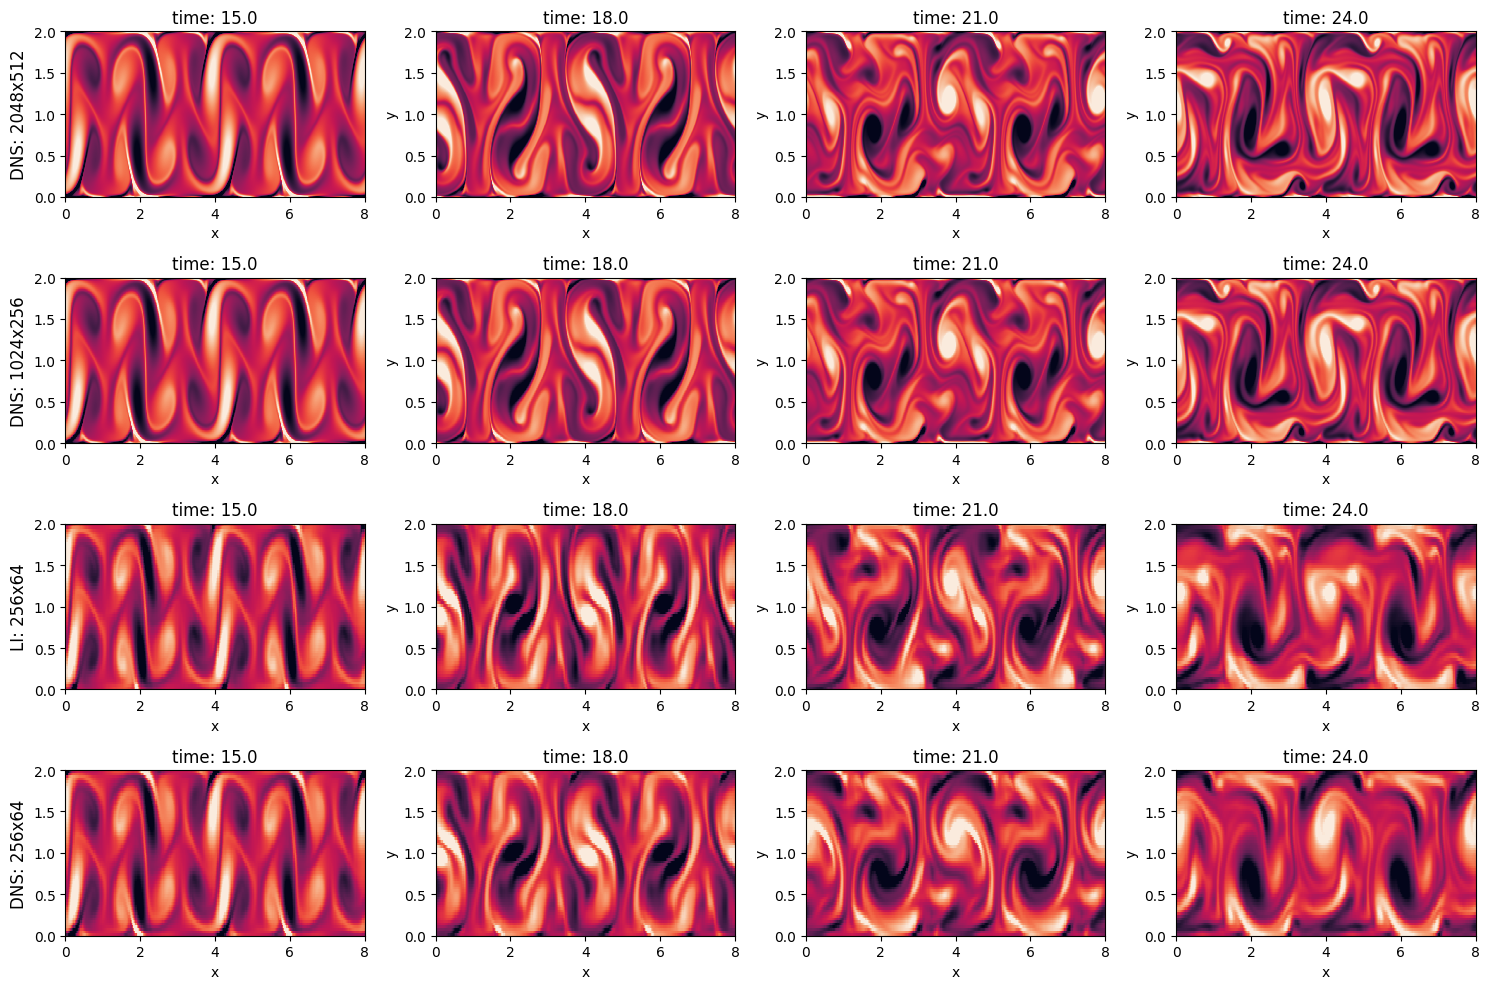

In [63]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    plot_var(models,rows,columns,'vorticity',figsize=(15,10))